In [31]:
import env
import acquire
import split_scale
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler

In [ ]:
#df_iris = acquire.wrangle_iris()

In [ ]:
df_excel, df_excel_sample = acquire.excel_reader()

In [ ]:
df_google, unique_categories = acquire.google_sheet()

In [ ]:
print('y')

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import split_scale
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import wrangle
import env
import seaborn as sns

url = env.get_db_url('iris_db')
#
def prep_iris():
    df = pd.read_sql("""

SELECT *
FROM measurements m
JOIN species s on s.species_id = m.species_id;
"""
,url)
    print(df.head(3))
    
    print(df.shape)
    
    print(df.columns)
    
    print(df.dtypes)
    
    print(df.describe())
    return df


def excel_reader():
    df_excel = pd.read_excel('Excel_Exercises.xlsx',sheet_name='Table1_CustDetails')
    df_excel_sample = pd.read_excel('Excel_Exercises.xlsx',sheet_name='Table1_CustDetails',nrows=100)
    print(df_excel.columns[0:5])
    print(df_excel.dtypes[df_excel.dtypes == object])
    print(df_excel.describe().loc[['min','max']])
    return df_excel, df_excel_sample


def google_sheet():
    google_sheet = "https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357"
    google_sheet = google_sheet.replace("edit#gid","export?format=csv&gid")
    df_google = pd.read_csv(google_sheet)
    print(df_google.iloc[0:3])
    print(df_google.columns)
    print(df_google.dtypes)
    print(df_google.describe(include =[np.number]))
    unique_categories = df_google[['Survived','Pclass','Sex','SibSp','Embarked']]
    unique_categories = [unique_categories[i].unique().tolist() for i in unique_categories.columns]
    print(unique_categories)
    return df_google, unique_categories


url = env.get_db_url('titanic_db')

def wrangle_titanic():
    df = pd.read_sql("""

SELECT *
FROM passengers
"""
,url)
    return df


def wrangle_iris2():
    df = pd.read_sql("""

SELECT *
FROM measurements m
JOIN species s on s.species_id = m.species_id;
"""
,url)

In [ ]:
#df_iris = acquire.wrangle_iris()

In [ ]:
#df_iris.head(1)

In [ ]:
#df_iris.drop(['species_id','measurement_id'],axis=1,inplace=True)

In [ ]:
#df_iris.head(2)

In [ ]:
#df_iris.rename(columns={'species_name':'species'},inplace=True)

In [ ]:
#int_encoder = LabelEncoder()
#int_encoder.fit(df_iris.species)
#df_iris.species = int_encoder.transform(df_iris.species)

In [ ]:
df_iris = acquire.prep_iris()

In [ ]:
df_t = acquire.wrangle_titanic()

In [ ]:

df_t.head(2)

In [ ]:
df_t.drop(columns=['deck'],inplace=True)

In [ ]:
df_t.isnull().sum()

In [ ]:
df_t.fillna(np.nan,inplace=True)

In [ ]:
imp_mode = SimpleImputer(missing_values=np.nan,strategy='most_frequent')

imp_mode.fit(df_t[['embarked']])

df_t['embarked'] = imp_mode.transform(df_t[['embarked']])

In [ ]:
imp_mode.fit(df_t[['embark_town']])
df_t['embark_town'] = imp_mode.transform(df_t[['embark_town']])

In [ ]:
scaler = MinMaxScaler().fit(df_t[['age','fare']])

In [ ]:
df_t_scaled = scaler.transform(df_t[['age','fare']])

In [ ]:
df_t.head(2)

In [ ]:
df_t_scaled = pd.DataFrame(df_t_scaled)

In [ ]:
df_t = pd.concat([df_t,df_t_scaled],axis=1,join='inner')

In [ ]:
df_t.rename(columns={0:'age_scaled',1:'fare_scaled'},inplace=True)

In [ ]:
df_t.head(2)

In [ ]:
df = acquire.prep_titanic()

In [ ]:
df.head(2)

In [ ]:
sns.distplot(df.fare,bins=None)

In [3]:
df = prep.prep_iris()

In [5]:
#split test train
train_df,test_df = split_scale.split_my_data(df,train_ratio=.7,seed=123)

In [10]:
train_df.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,105.000000,105.000000,105.000000,105.000000,105.000000
mean,5.869524,3.050476,3.837143,1.232381,1.009524
std,0.796039,0.409062,1.714265,0.739217,0.790511
min,4.400000,2.200000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.400000,0.000000
50%,5.800000,3.000000,4.400000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.700000,4.400000,6.900000,2.500000,2.000000


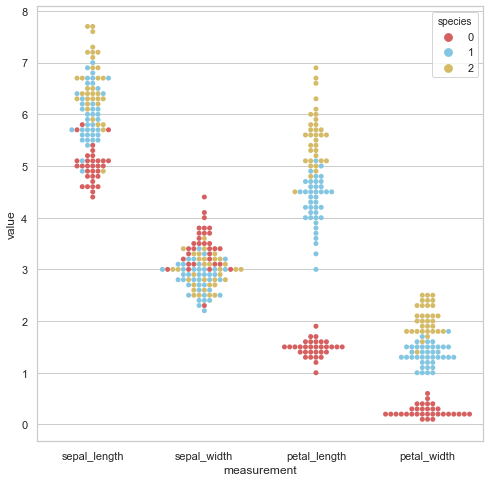

In [26]:
sns.set(style="whitegrid", palette="muted")

# "Melt" the dataset to "long-form" representation
df_melt = pd.melt(train_df[['sepal_length','sepal_width','petal_length','petal_width','species']], "species", var_name="measurement")

plt.figure(figsize=(8,8))
# Draw a categorical scatterplot to show each observation
p = sns.swarmplot(x="measurement", y="value", hue="species",
              palette=["r", "c", "y"], data=df_melt)
#p.set(yscale="log")

plt.show()

In [57]:
train_df['sepal_area'] = train_df.sepal_length * train_df.sepal_width
train_df['petal_area'] = train_df.petal_length * train_df.petal_width

In [59]:
train_df_scatter = list(itertools.combinations(train_df.columns,2))


In [60]:
train_df_scatter

[('sepal_length', 'sepal_width'),
 ('sepal_length', 'petal_length'),
 ('sepal_length', 'petal_width'),
 ('sepal_length', 'species'),
 ('sepal_length', 'sepal_area'),
 ('sepal_length', 'petal_area'),
 ('sepal_width', 'petal_length'),
 ('sepal_width', 'petal_width'),
 ('sepal_width', 'species'),
 ('sepal_width', 'sepal_area'),
 ('sepal_width', 'petal_area'),
 ('petal_length', 'petal_width'),
 ('petal_length', 'species'),
 ('petal_length', 'sepal_area'),
 ('petal_length', 'petal_area'),
 ('petal_width', 'species'),
 ('petal_width', 'sepal_area'),
 ('petal_width', 'petal_area'),
 ('species', 'sepal_area'),
 ('species', 'petal_area'),
 ('sepal_area', 'petal_area')]

[('sepal_length', 'petal_length'),
 ('sepal_length', 'petal_width'),
 ('sepal_width', 'petal_length'),
 ('sepal_width', 'petal_width')]